In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("Assignment0.ipynb")

# CMPUT 200 Winter 2022
# Assignment 0

Each assignment will be distributed as a notebook such as this one.  You will execute the questions in the notebook.  The questions might ask for a short answer in text form or for you to write and execute a piece of code. 
For short answer questions you must enter your answer in the provided space.  For coding questions you must use the provided space.  When you are done, you will submit your work from the notebook. At the end of this notebook there is an 'export' cell. Make sure to save your notebook before running it, and then submit on eClass the .zip file that it should make in your directory.

In [2]:
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, 
# but it won't ask you who you are because it remembers you. 
# However, you will need to log in once per assignment.
# When you log-in please hit return (not shift + return) after typing in your email

%pip install -r requirements.txt
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# These lines do some fancy plotting magic.
import matplotlib
# This is a magic function that renders the figure in the notebook, instead of displaying a dump of the figure object.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import otter
grader = otter.Notebook()

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


## Importing Data

## Linear Regression

In [3]:
# Just run this cell
pten = pd.read_csv("pten.csv")
pten.head(5)

,Cell Line,Copy Number,mRNA Expression (Affy),mRNA Expression (RNAseq)
0,DMS53_LUNG,0.1728,7.482898,2.489797
1,SW1116_LARGE_INTESTINE,0.1910,8.154946,2.868566
2,NCIH1694_LUNG,-0.2372,7.993083,2.821475
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.0129,9.963575,4.657019
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-1.1013,8.741163,2.752360


array([[<AxesSubplot:title={'center':'Copy Number'}>]], dtype=object)

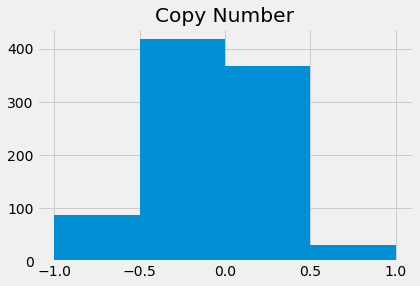

In [4]:
# Just run this cell
pten.hist("Copy Number", bins = np.arange(-1, 1.5, 0.5))

**Question 1**

Looking at the histogram above, we want to check whether or not `Copy Number` is in standard units. For this question, compute the mean and the standard deviation of the values in `Copy Number` and assign these values to `copy_number_mean` and `copy_number_sd` respectively. After you calculate these values, assign `is_su` to either `True` if you think that `Copy Numbers` is in standard units or `False` if you think otherwise.

In [5]:
copy_number = pten['Copy Number']
copy_number_mean = ...
copy_number_sd = ...
is_su = ...
print(f"Mean: {copy_number_mean}, SD: {copy_number_sd}, Is in standard units?: {is_su}")

Mean: Ellipsis, SD: Ellipsis, Is in standard units?: Ellipsis


In [6]:
grader.check("q1")

q1 results:
    q1 - 1 result:
        Trying:
            np.isclose(copy_number_mean, -0.19447913669064748)
        Expecting:
            True
        **********************************************************************
        Line 1, in q1 0
        Failed example:
            np.isclose(copy_number_mean, -0.19447913669064748)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1 0[0]>", line 1, in <module>
                np.isclose(copy_number_mean, -0.19447913669064748)
              File "<__array_function__ internals>", line 5, in isclose
              File "/opt/homebrew/lib/python3.9/site-packages/numpy/core/numeric.py", line 2355, in isclose
                xfin = isfinite(x)
            TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

    q1 - 2 result:
        Trying:
            np.isclose(copy_number_sd, 0.7466239639509008)
        Expecting:
            True
        **********************************************************************
        Line 1, in q1 1
        Failed example:
            np.isclose(copy_number_sd, 0.7466239639509008)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q1 1[0]>", line 1, in <module>
                np.isclose(copy_number_sd, 0.7466239639509008)
              File "<__array_function__ internals>", line 5, in isclose
              File "/opt/homebrew/lib/python3.9/site-packages/numpy/core/numeric.py", line 2355, in isclose
                xfin = isfinite(x)
            TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Question 2**

Create the function `standard_units` so that it converts the values in the array `arr` to standard units. We'll then use `standard_units` to create a new table, `pten_su`, that converts all the values in the table `pten` to standard units.

In [7]:
def standard_units(arr):
    ...

# DON'T DELETE OR MODIFY ANY OF THE LINES OF CODE BELOW IN THIS CELL
pten_su = pd.DataFrame({"Cell Line": pten["Cell Line"],
            "Copy Number SU": standard_units(pten["Copy Number"]),
            "mRNA Expression (Affy) SU": standard_units(pten["mRNA Expression (Affy)"]),
            "mRNA Expression (RNAseq) SU": standard_units(pten["mRNA Expression (RNAseq)"])}) 
print(pten_su.head(5))

                                  Cell Line Copy Number SU  \
0                                DMS53_LUNG           None   
1                    SW1116_LARGE_INTESTINE           None   
2                             NCIH1694_LUNG           None   
3  P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE           None   
4  HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE           None   

  mRNA Expression (Affy) SU mRNA Expression (RNAseq) SU  
0                      None                        None  
1                      None                        None  
2                      None                        None  
3                      None                        None  
4                      None                        None  


In [8]:
grader.check("q2")

q2 results:
    q2 - 1 result:
        Trying:
            assert standard_units(pten["Copy Number"][0:10]) == [0.7856671414279968, 0.8056146080509384, 0.33630113508700193, 0.5821372209950144, -0.6107651236428848, -1.736372168794596, 0.5038817750127046, 0.6086607755156291, 0.47067253112945545, -1.7457978947812607]
        Expecting nothing
        **********************************************************************
        Line 1, in q2 0
        Failed example:
            assert standard_units(pten["Copy Number"][0:10]) == [0.7856671414279968, 0.8056146080509384, 0.33630113508700193, 0.5821372209950144, -0.6107651236428848, -1.736372168794596, 0.5038817750127046, 0.6086607755156291, 0.47067253112945545, -1.7457978947812607]
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q2 0[0]>", line 1, in <module>
                assert standard_units(pten["Copy Number"][0:10]) == [0.7856671414279968, 0.8056146080509384, 0.33630113508700193, 0.5821372209950144, -0.6107651236428848, -1.736372168794596, 0.5038817750127046, 0.6086607755156291, 0.47067253112945545, -1.7457978947812607]
            AssertionError

You should always visually inspect your data, before numerically analyzing any relationships in your dataset. Run the following cell in order to look at the relationship between the variables in our dataset.

<AxesSubplot:xlabel='mRNA Expression (Affy) SU', ylabel='mRNA Expression (RNAseq) SU'>

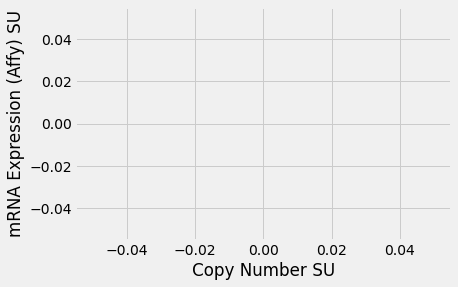

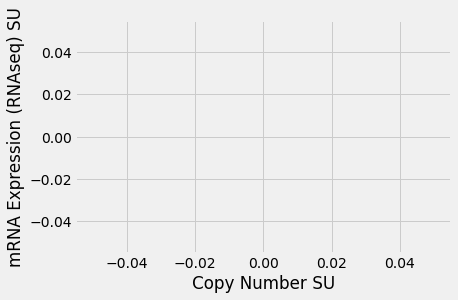

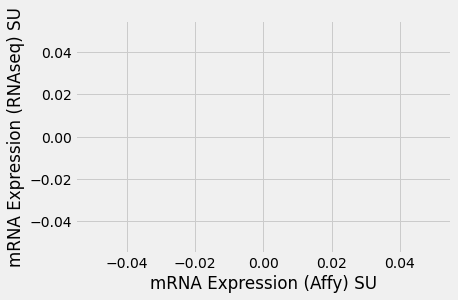

In [9]:
# Just run this cell
pten_su.plot.scatter("Copy Number SU", "mRNA Expression (Affy) SU")
pten_su.plot.scatter("Copy Number SU", "mRNA Expression (RNAseq) SU")
pten_su.plot.scatter("mRNA Expression (Affy) SU", "mRNA Expression (RNAseq) SU")

**Question 3**

Which of the following relationships do you think has the highest correlation (i.e. highest absolute value of `r`)? Assign `highest_correlation` to the number corresponding to the relationship you think has the highest correlation.

1. Copy Number vs. mRNA Expression (Affy)
2. Copy Number vs. mRNA Expression (RNAseq)
3. mRNA Expression (Affy) vs. mRNA Expression (RNAseq)

In [10]:
highest_correlation = ...

**Question 4**

Now, using the `standard units` function, define the function `correlation` which computes the correlation between `arr1` and `arr2`.

In [11]:
def correlation(arr1, arr2):
    ...
# This computes the correlation between the different variables in pten
copy_affy = correlation(pten["Copy Number"], pten["mRNA Expression (Affy)"])
copy_rnaseq = correlation(pten["Copy Number"], pten["mRNA Expression (RNAseq)"])
affy_rnaseq = correlation(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])

print(f" \
      Copy Number vs. mRNA Expression (Affy) Correlation: {copy_affy}, \n \
      Copy Number vs. mRNA Expression (RNAseq) Correlation: {copy_rnaseq}, \n \
      mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: {affy_rnaseq}")

       Copy Number vs. mRNA Expression (Affy) Correlation: None, 
       Copy Number vs. mRNA Expression (RNAseq) Correlation: None, 
       mRNA Expression (Affy) vs. mRNA Expression (RNAseq) Correlation: None


In [12]:
grader.check("q4")

q4 results:
    q4 - 1 result:
        Trying:
            assert copy_affy == 0.5813535649557299
        Expecting nothing
        **********************************************************************
        Line 1, in q4 0
        Failed example:
            assert copy_affy == 0.5813535649557299
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q4 0[0]>", line 1, in <module>
                assert copy_affy == 0.5813535649557299
            AssertionError

**Question 5**

If we switch what we input as arguments to `correlation`, i.e. found the correlation between `mRNA Expression (Affy)` vs. `Copy Number` instead of the other way around, would the correlation change? Assign `correlation_change` to either `True` if you think yes, or `False` if you think no.

In [13]:
correlation_change = ...

<!-- BEGIN QUESTION -->

**Question 6**

Looking at both the scatter plots after Question 2 and the correlations computed in Question 4, describe a pattern you see in the relationships between the variables.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 7**

Let's look at the relationship between mRNA Expression (Affy) vs. mRNA Expression (RNAseq) only. Define a function called `regression_parameters` that returns the parameters of the regression line as a two-item array containing the slope and intercept of the regression line as the first and second elements respectively. The function `regression_line` takes in two arguments, an array of `x` values, and an array of `y` values.

In [14]:
def regression_parameters(x, y):
    ...
    intercept = ...
    slope = ...
    return [slope, intercept]
    
parameters = regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"])
parameters

[Ellipsis, Ellipsis]

In [15]:
grader.check("q7")

q7 results:
    q7 - 1 result:
        Trying:
            assert regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"]) == [1.0711396405744356, -6.454283849890932]
        Expecting nothing
        **********************************************************************
        Line 1, in q7 0
        Failed example:
            assert regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"]) == [1.0711396405744356, -6.454283849890932]
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q7 0[0]>", line 1, in <module>
                assert regression_parameters(pten["mRNA Expression (Affy)"], pten["mRNA Expression (RNAseq)"]) == [1.0711396405744356, -6.454283849890932]
            AssertionError

**Question 8**

If we switch what we input as arguments to `regression_parameters`, i.e. found the parameters for the regression line for `mRNA Expression (RNAseq)` vs. `mRNA Expression (Affy)` instead of the other way around, would the regression parameters change (would the slope and/or intercept change)? Assign `parameters_change` to either `True` if you think yes, or `False` if you think no.

In [16]:
parameters_change = ...

**Question 9**

Now, let's look at how the regression parameters look like in standard units. Use the table `pten_su` and the function `regression_parameters`, and assign `parameters_su` to a two-item array containing the slope and the intercept of the regression line for mRNA Expression (Affy) in standard units vs. mRNA Expression (RNAseq) in standard units.

In [17]:
parameters_su = ...
parameters_su

Ellipsis

In [18]:
grader.check("q9")

q9 results:
    q9 - 1 result:
        Trying:
            assert parameters_su == [0.9000764746535065, 1.648472490521448e-16]
        Expecting nothing
        **********************************************************************
        Line 1, in q9 0
        Failed example:
            assert parameters_su == [0.9000764746535065, 1.648472490521448e-16]
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q9 0[0]>", line 1, in <module>
                assert parameters_su == [0.9000764746535065, 1.648472490521448e-16]
            AssertionError

<!-- BEGIN QUESTION -->

**Question 10**

Looking at the array `parameters_su`, what do you notice about the slope and intercept values specifically? Relate them to another value we already calculated in a previous question, as well as relate them to an equation.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 11**

The oldest and most commonly used cell line in Biology is the HeLa cell line, named after Henrietta Lacks, whose cervical cancer cells were taken without her consent in 1951 to create this cell line. The issue of data privacy and consent is very important to data science! You can read more about this topic [here](https://www.hopkinsmedicine.org/henriettalacks/).

The HeLa cell line is missing from our dataset. If we know that the HeLa mRNA Expression (Affy) value is 8.2, what is the predicted mRNA Expression (RNAseq) value? Use the values in `parameters` that we derived in Question 7, and assign the result to `hela_rnaseq`.

In [19]:
hela_rnaseq = ...

In [20]:
grader.check("q11")

q11 results:
    q11 - 1 result:
        Trying:
            np.isclose(hela_rnaseq, 2.329061202819438)
        Expecting:
            True
        **********************************************************************
        Line 1, in q11 0
        Failed example:
            np.isclose(hela_rnaseq, 2.329061202819438)
        Exception raised:
            Traceback (most recent call last):
              File "/opt/homebrew/Cellar/python@3.9/3.9.7/Frameworks/Python.framework/Versions/3.9/lib/python3.9/doctest.py", line 1336, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q11 0[0]>", line 1, in <module>
                np.isclose(hela_rnaseq, 2.329061202819438)
              File "<__array_function__ internals>", line 5, in isclose
              File "/opt/homebrew/lib/python3.9/site-packages/numpy/core/numeric.py", line 2355, in isclose
                xfin = isfinite(x)
            TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

**Question 12**

Compute the predicted mRNA Expression (RNAseq) values from the mRNA Expression (Affy) values in the `pten` table. Use the values in the `parameters` array from Question 7, and assign the result to `predicted_rnaseq`. We'll plot your computed regression line with the scatter plot from after question 2 of mRNA Expression (Affy) vs. mRNA Expression (RNAseq).

ValueError: x and y must have same first dimension, but have shapes (973,) and (1,)

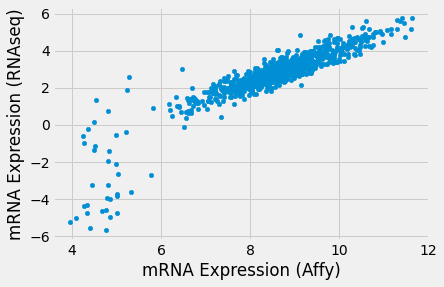

In [21]:
predicted_rnaseq = ...
# DON'T CHANGE/DELETE ANY OF THE BELOW CODE IN THIS CELL
pten["Predicted mRNA Expression (RNAseq)"] = predicted_rnaseq
pten[["mRNA Expression (Affy)", "mRNA Expression (RNAseq)", "Predicted mRNA Expression (RNAseq)"]].plot.scatter("mRNA Expression (Affy)", "mRNA Expression (RNAseq)")
plt.plot(pten["mRNA Expression (Affy)"], predicted_rnaseq)

## Fitting a least-squares regression line

Recall that the least-square regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error.

**Question 13**

Define a function called `RMSE`. It takes in one argument 'params' which is a two-item array. The items are:

1. the slope of a line (a number)
2. the intercept of a line (a number).

It should return a number that is the root mean squared error (RMSE) for a line defined with the arguments slope and intercept used to predict mRNA Expression (RNAseq) values from mRNA Expression (Affy) values for each row in the `pten` table.

*Hint: Errors are defined as the difference between the actual `y` values and the predicted `y` values.*

*Note: if you need a refresher on RMSE, here's the [link](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#Root-Mean-Squared-Error) from the textbook*

In [ ]:
def RMSE(params):
    slope, intercept = params[0], params[1]
    affy = pten["mRNA Expression (Affy)"]
    rnaseq = pten["mRNA Expression (RNAseq)"]
    predicted_rnaseq = ...
    ...

# DON'T CHANGE THE FOLLOWING LINES BELOW IN THIS CELL
rmse_example = RMSE([0.5, 6])
rmse_example

In [ ]:
grader.check("q13")

<!-- BEGIN QUESTION -->

**Question 14**

What is the RMSE of a line with slope 0 and intercept of the mean of `y` equal to?

*Hint 1: The line with slope 0 and intercept of mean of `y` is just a straight horizontal line at the mean of `y`*

*Hint 2: What does the formula for RMSE become if we input our predicted `y` values in the formula. Try writing it out on paper! It should be a familiar formula.*

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 15**

Find the parameters that minimizes RMSE of the regression line for mRNA Expression (Affy) vs. mRNA Expression (RNAseq). Assign the result to `minimized_parameters`.

You will have to use the `minimize` [function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) from the scipy library.

*Hint: Use the `RMSE` function in Question 13*

In [ ]:
minimized_parameters = ...
list(minimized_parameters["x"])

In [ ]:
grader.check("q15")

<!-- BEGIN QUESTION -->

**Question 16**

The slope and intercept pair you found in Question 15 should be very similar to the values that you found in Question 7. Why were we able to minimize RMSE to find the same slope and intercept from the previous formulas?

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 17**

If we had instead minimized mean squared error (MSE), would we have gotten the same slope and intercept of the minimized root mean squared error (RMSE) results? Assign `same_parameters` to either `True` if you think yes, or `False` if you think no.

_Type your answer here, replacing this text._

In [ ]:
same_parameters = ...
same_parameters

In [ ]:
grader.check("q17")

<!-- BEGIN QUESTION -->

**Question 18**

Using a linear regression model, would we be able to obtain accurate predictions for most of the points? Explain why or why not.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Convert manually graded questions to pdf**

Running the following cell will convert the manually graded questions to pdf. 

In [ ]:
! otter export -e html "Assignment0.ipynb" --filtering

## SUBMISSION INSTRUCTIONS
This is the end of Assignment 0.  Be sure to run the tests and verify that they all pass (just because the tests pass does not mean it's the right answer). For submission you need to submit *2 files* on eclass: 

1- a zip file "CCID.zip", this zip file will only include this notebook  
2- pdf of the manually graded questions

This assignment contains altered snippets from the original [Berkeley data-8 course](http://data8.org/), which is licensed under the [Creative Commons license](https://creativecommons.org/licenses/by-nc/4.0/).